## importing from library

In [2]:
import pandas as pd

In [3]:
## importing matplotlib
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
# Importing Normalizer
from sklearn.preprocessing import Normalizer

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
## importing for linear regression
from sklearn.linear_model import LinearRegression

In [10]:
import math

In [11]:
from math import sqrt

In [12]:
## Importing MAE , MSE , R2 metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [13]:
import numpy as np

In [14]:
from scipy import stats

In [15]:
from scipy.stats import shapiro

In [16]:
from scipy.stats import norm

In [17]:
from scipy.stats import anderson

In [18]:
## importing the CSV File
Data = pd.read_csv("marketing_customer_analysis.csv")

In [29]:
Data.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [20]:
#to get all columns with numeric data type
num_cols = Data._get_numeric_data().columns
num_cols

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

## Checking Normality by Shapiro method

In [21]:
##num_cols = norm.rvs(size=500)
## the shapiro test is not accurate as the data is more that 5000
shapiro(Data[num_cols])

/Users/vikas/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.4013866186141968, 0.0)

## Checking Normality by Anderson Darlings method

In [23]:
# defining the num_cols as list
columns = list(num_cols)
columns

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [24]:
## Anderson method to check the normality of data
for i in range(len(columns)):
    x = stats.anderson(Data[num_cols[i]],dist ='norm')
    print (num_cols[i])
    print (x)  
## Null Hypothesis = The distribution is normal
## After the anderson test , 5% cutoff has a higher value of 0.787 
## Hence we do not reject the Null Hypothesis 

Customer Lifetime Value
AndersonResult(statistic=708.6639772973795, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Income
AndersonResult(statistic=196.31733115614225, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Monthly Premium Auto
AndersonResult(statistic=453.6675788446955, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Months Since Last Claim
AndersonResult(statistic=118.01912790124334, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Months Since Policy Inception
AndersonResult(statistic=82.39764909487894, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Number of Open Complaints
AndersonResult(statistic=2040.3595139249737, critical_va

## Checking multicollinearity.

In [25]:
## checking the correlation of Data
Data.corr()

Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024366   
Income                                        0.024366  1.000000   
Monthly Premium Auto                          0.396262 -0.016665   
Months Since Last Claim                       0.011517 -0.026715   
Months Since Policy Inception                 0.009418 -0.000875   
Number of Open Complaints                    -0.036343  0.006408   
Number of Policies                            0.021955 -0.008656   
Total Claim Amount                            0.226451 -0.355254   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396262                 0.011517   
Income                                    -0.016665                -0.026715   
Monthly Premium Auto                       1.000000                 0.005026   
Months Since Last Claim                    0.005026                 1.000000   
Months Since Policy Inception              0.020257                -0.042959   
Number of Open Complaints                 -0.013122                 0.005354   
Number of Policies                        -0.011233                 0.009136   
Total Claim Amount                         0.632017                 0.007563   

                               Months Since Policy Inception  \
Customer Lifetime Value                             0.009418   
Income                                             -0.000875   
Monthly Premium Auto                                0.020257   
Months Since Last Claim                            -0.042959   
Months Since Policy Inception                       1.000000   
Number of Open Complaints                          -0.001158   
Number of Policies                                 -0.013333   
Total Claim Amount                                  0.003335   

                               Number of Open Complaints  Number of Policies  \
Customer Lifetime Value                        -0.036343            0.021955   
Income                                          0.006408           -0.008656   
Monthly Premium Auto                           -0.013122           -0.011233   
Months Since Last Claim                         0.005354            0.009136   
Months Since Policy Inception                  -0.001158           -0.013333   
Number of Open Complaints                       1.000000            0.001498   
Number of Policies                              0.001498            1.000000   
Total Claim Amount                             -0.014241           -0.002354   

                               Total Claim Amount  
Customer Lifetime Value                  0.226451  
Income                                  -0.355254  
Monthly Premium Auto                     0.632017  
Months Since Last Claim                  0.007563  
Months Since Policy Inception            0.003335  
Number of Open Complaints               -0.014241  
Number of Policies                      -0.002354  
Total Claim Amount                       1.000000

<function matplotlib.pyplot.show(*args, **kw)>

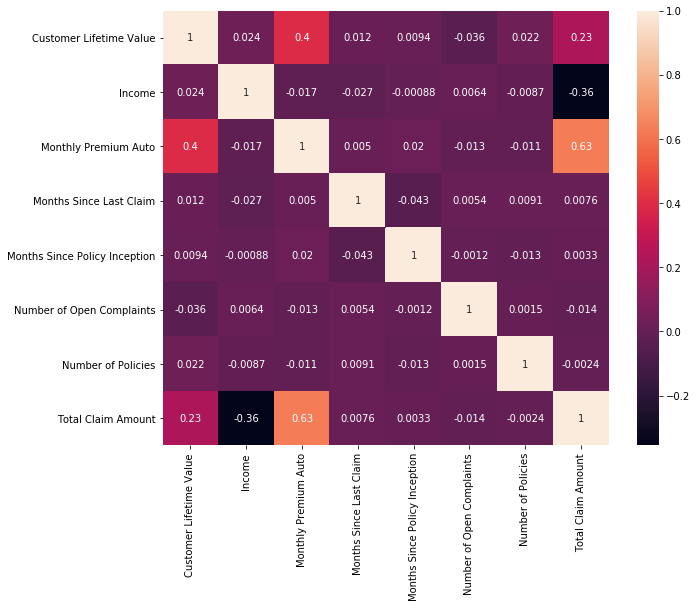

In [26]:
##plotting heat map pearson
corr_matrix = Data.corr(method='pearson')
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix ,annot =True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

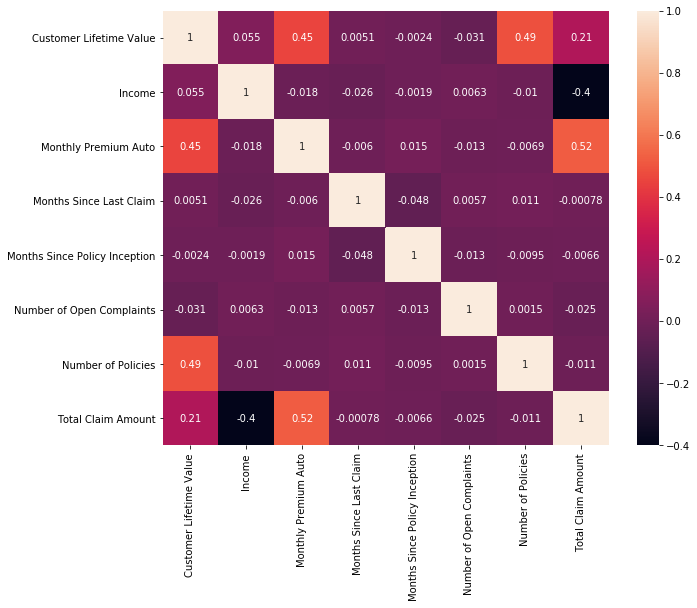

In [27]:
##plotting heat map spearman
corr_matrix = Data.corr(method='spearman')
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix ,annot =True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

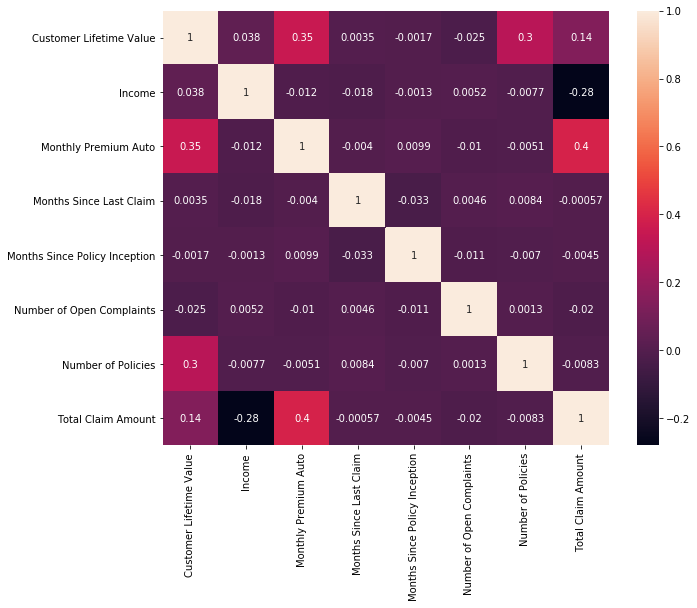

In [28]:
##plotting heat map kendall
corr_matrix = Data.corr(method='kendall')
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix ,annot =True)
plt.show

## Processing the data

In [30]:
## Selecting the categorical data and dropping column cusotmer and effecetive to date
categorical_data = Data.select_dtypes('object').drop(['Customer','Effective To Date'],axis = 1)

In [31]:
## OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'error', drop = 'first').fit(categorical_data)

In [32]:
encoded = encoder.transform(categorical_data).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [33]:
##Changing encoded in dataframe
df = pd.DataFrame(encoded)

In [34]:
## Checking the data
df.head()

0    1    2    3    4    5    6    7    8    9   ...   33   34   35   36  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    37   38   39   40   41   42  
0  0.0  0.0  0.0  1.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  1.0  1.0  0.0  
3  0.0  1.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 43 columns]

In [35]:
## assigning Y variable to Total Claim Amount
y = Data['Total Claim Amount']
x = Data.drop('Total Claim Amount',axis=1)

In [36]:
## assigning x to all the numerical data types
x = x.select_dtypes('number')

In [37]:
## Normalizing the data
transformer = Normalizer().fit(x)
x_normalized = transformer.transform(x)

In [50]:
## creating variable to store the list of columns
cols = list(x.columns)

Customer Lifetime Value


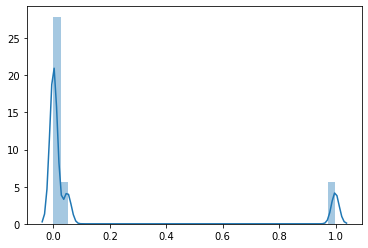

Income


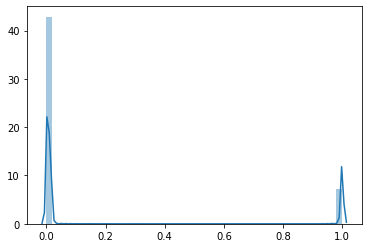

Monthly Premium Auto


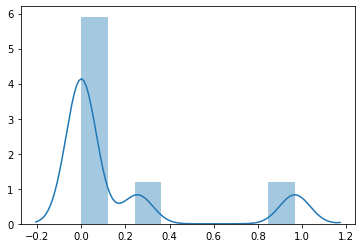

Months Since Last Claim


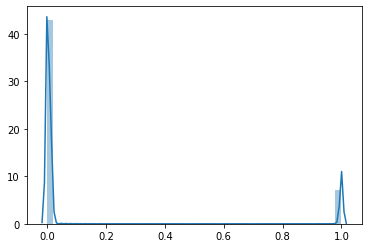

Months Since Policy Inception


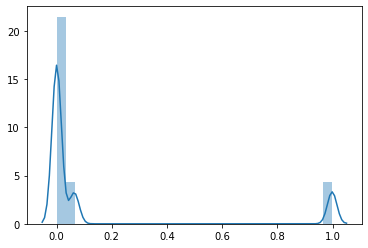

Number of Open Complaints


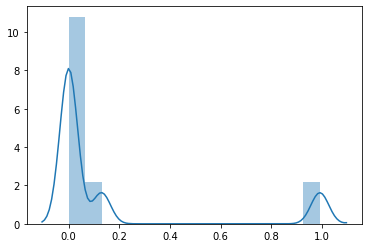

Number of Policies


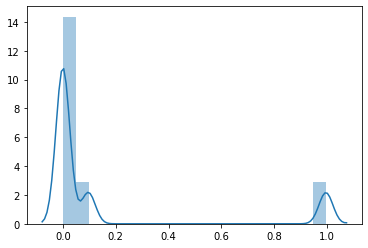

In [51]:
## Creating loop for showing the box plot of Normalized data
for i in range(len(cols)):
    print (cols[i])
    sns.distplot(x_normalized[i])
    plt.show()
    
i=i+1

In [38]:
#converting the normalized data into data frame
df_new = pd.DataFrame(x_normalized)

In [39]:
# concatinating both the data frames
DATA1 = pd.concat([df,df_new],join = 'inner',axis =1)

In [41]:
## Checking the data
DATA1.head()

0    1    2    3    4    5    6    7    8    9   ...   40   41   42  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   

         0         1         2         3         4    5         6   
0  0.049049  0.998795  0.001225  0.000568  0.000089  0.0  0.000018  
1  0.999889  0.000000  0.013466  0.001862  0.006017  0.0  0.001146  
2  0.255494  0.966808  0.002141  0.000357  0.000753  0.0  0.000040  
3  0.999865  0.000000  0.013862  0.002354  0.008500  0.0  0.000915  
4  0.064055  0.997944  0.001662  0.000273  0.001002  0.0  0.000023  

[5 rows x 50 columns]

## Linear Regression

In [42]:
##X-Y testing
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 100)

In [43]:
## applying X_Y test into the model
model = LinearRegression ()

In [44]:
lm = model.fit(x_train , y_train)

In [45]:
predictions = lm.predict(x_test)

In [46]:
predictions

array([217.06915964, 662.33251833, 310.45489559, ..., 458.67157101,
       721.83227063, 315.70954569])

In [47]:
residual = predictions - y_test

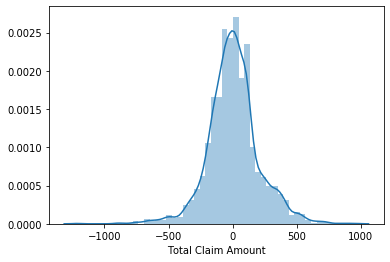

In [48]:
## Plotting residual 
sns.distplot(residual)

In [49]:
## finding MAE , MSE , r2 and RMSE score of the test set
MAE = mean_absolute_error (y_test , predictions)
MSE = mean_squared_error (y_test , predictions)
R2 = r2_score (y_test , predictions)
RMSE = sqrt(mean_squared_error (y_test , predictions))

In [ ]:
print ("MAE of the linear model on the test set is" , MAE)
print ("MSE of the linear model on the test set is" , MSE)
print ("R2 score of the linear model on the test set is" , R2)
print ("RMSE score of the linear model on the test set is" , RMSE)